In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\saurav\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
iris_data=pd.read_csv("C:/Users/saurav/Desktop/code_stack_python/Iris Project/Iris.csv")
iris_data.head(60)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
##Designing the test set and train set

In [53]:
X = np.array(iris_data.ix[:, 0:4])
y = np.array(iris_data['Species'])
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=3)

In [58]:
# Working for a given value of K ----> number neighbours
#model = KNeighborsClassifier(n_neighbors=9)
# fitting the model
#model.fit(X_train, y_train)
#pred= model.predict(X_test)
#print(accuracy_score(y_test,pred))


In [66]:
neighRange = range(1,30)
# We can create Python dictionary using [] or dict()
scores = []
for k in neighRange:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    
print(scores)
## For predicting anonymous model
model.predict([[5.0,3.3,1.4,0.2]])

[0.97777777777777775, 0.9555555555555556, 0.98888888888888893, 0.96666666666666667, 0.98888888888888893, 0.96666666666666667, 0.97777777777777775, 0.96666666666666667, 1.0, 1.0, 0.97777777777777775, 0.97777777777777775, 1.0, 0.98888888888888893, 1.0, 0.98888888888888893, 1.0, 0.98888888888888893, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.96666666666666667, 0.96666666666666667, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.94444444444444442, 0.94444444444444442]


array(['Iris-setosa'], dtype=object)

In [67]:
#Recording the missclassification errors
missClass = [1 - x for x in scores]

# determining best k
optimal_k = neighRange[missClass.index(min(missClass))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


Text(0,0.5,'Testing Accuracy')

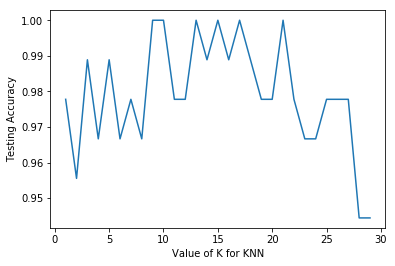

In [68]:
plt.plot(neighRange, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')